In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
train_face_young_adult_dir = "training-young-adult/"
train_face_adult_dir = "training-adult/"
train_face_old_dir = "training-old/"

test_face_young_adult_dir = "testing-young-adult/"
test_face_adult_dir = "testing-adult/"
test_face_old_dir = "testing-old/"



img_height, img_width = 150, 150
batch_size = 32

In [10]:
# ImageDataGenerator for data preprocessing and augmentation
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Training generator for young adult and adult classes
train_generator = train_datagen.flow_from_directory(
    directory='',
    classes=['training-young-adult', 'training-adult', 'training-old'],
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Testing generator for young adult and adult classes
test_generator = test_datagen.flow_from_directory(
    directory='',
    classes=['testing-young-adult', 'testing-adult', 'testing-old'],
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Shuffle set to False for accurate test predictions
)

Found 528 images belonging to 3 classes.
Found 165 images belonging to 3 classes.


In [11]:
# Model architecture: a basic CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\Suryansh SR\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,739 (18.42 MB)

 Trainable params: 4,828,739 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10


C:\Users\Suryansh SR\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 371ms/step - accuracy: 0.3552 - loss: 1.2570 - val_accuracy: 0.4121 - val_loss: 0.9760
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 346ms/step - accuracy: 0.5273 - loss: 0.9375 - val_accuracy: 0.6303 - val_loss: 0.7916
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 348ms/step - accuracy: 0.6186 - loss: 0.7927 - val_accuracy: 0.6242 - val_loss: 0.8204
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 351ms/step - accuracy: 0.6304 - loss: 0.7954 - val_accuracy: 0.7091 - val_loss: 0.7005
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 359ms/step - accuracy: 0.6889 - loss: 0.6979 - val_accuracy: 0.6909 - val_loss: 0.6799
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 378ms/step - accuracy: 0.7148 - loss: 0.6464 - val_accuracy: 0.7333 - val_loss: 0.5860
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 369ms/step - accuracy: 0.7565 - loss: 0.5238 - val_accuracy: 0.7515 - val_loss: 0.5458
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 369ms/step - accuracy: 0.7870 - loss: 0.5213 - val_accuracy: 0.8000 - val_

In [14]:
# Testing accuracy and count of correctly classified images
loss, accuracy = model.evaluate(test_generator)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.8222 - loss: 0.4149
Test Accuracy: 78.79%


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step


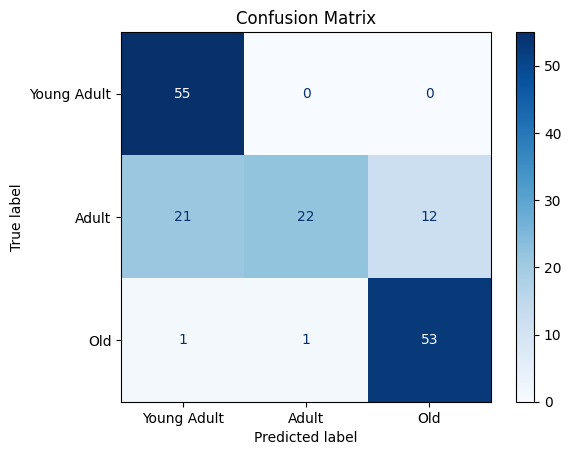

Classification Report:
              precision    recall  f1-score   support

 Young Adult       0.71      1.00      0.83        55
       Adult       0.96      0.40      0.56        55
         Old       0.82      0.96      0.88        55

    accuracy                           0.79       165
   macro avg       0.83      0.79      0.76       165
weighted avg       0.83      0.79      0.76       165



<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

In [15]:
# Predictions and Confusion Matrix
predictions = model.predict(test_generator, verbose=1)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_generator.classes

# Confusion matrix and report
conf_matrix = confusion_matrix(true_labels, predicted_labels)
ConfusionMatrixDisplay(conf_matrix, display_labels=['Young Adult', 'Adult', 'Old']).plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=['Young Adult', 'Adult', 'Old']))

plt.figure(figsize=(12, 5))

Text(0.5, 1.0, 'Training and Validation Accuracy')

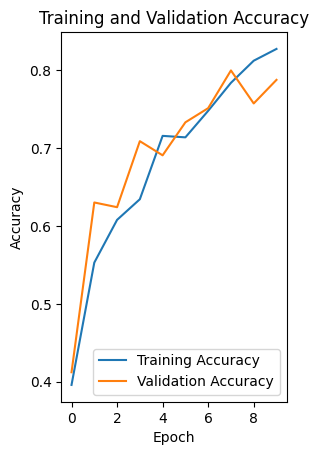

In [16]:
# Accuracy plot

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

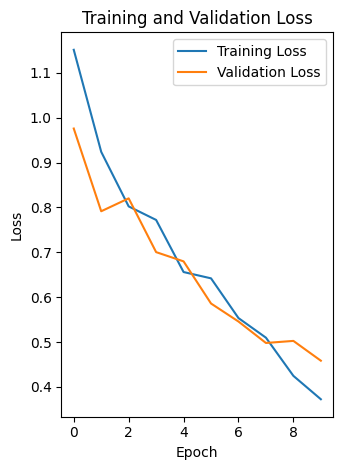

In [17]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

In [18]:
# Output summary of classification accuracy
correct_classifications = np.sum(predicted_labels == true_labels)
total_images = len(true_labels)

print(f"Correctly classified images: {correct_classifications} out of {total_images}")
print(f"Incorrectly classified images: {total_images - correct_classifications} out of {total_images}")
print(f"Classification accuracy: {correct_classifications / total_images * 100:.2f}%")

Correctly classified images: 130 out of 165
Incorrectly classified images: 35 out of 165
Classification accuracy: 78.79%
